**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [55]:
import numpy as np

class linear_regression:
  def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef
  
  def fit(self, X, y):
    """
    Fit linear model.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training data
    y : array_like, shape (n_samples, n_targets)
        Target values.
    """
    # variable declaration
    
    num_of_sample,num_of_var=np.shape(X)
    
    #normalize 
    if self.normalize:
        mean=np.mean(X,axis=0)
        std_dev=np.std(X,axis=0)
        X=(X-mean)/std_dev
        
    #intercept handler
    if self.fit_intercept:
        num_of_var=num_of_var+1
        X=np.hstack((np.ones((num_of_sample,1)),X))
        
    #initializing coef variable to zero
    self.coef= np.zeros(num_of_var)
    
    # calculating coefficients
    for i in range(0,self.iterations):
        err = (np.dot(X,self.coef)-y)
        tmp = np.dot(np.transpose(err),X)
        self.coef=self.coef - (self.learning_rate/num_of_sample) * tmp
    return self.coef
  
  def predict(self, X):
    """Predict using the linear model
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.
    """
    # variable declaration
    
    num_of_sample,num_of_var=np.shape(X)
    
    #normalize 
    if self.normalize:
        mean=np.mean(X,axis=0)
        std_dev=np.std(X,axis=0)
        X=(X-mean)/std_dev
        
    #intercept handler
    if self.fit_intercept:
        num_of_var=num_of_var+1
        X=np.hstack((np.ones((num_of_sample,1)),X))
    
    y=np.dot(X,self.coef)
    
    return y
LR=linear_regression(0.01,1500,normalize=True)

"""normalize parameter should not be assigned to False since the variables in boston data set has considerable difference 
in their range and has to be normalized to fit the regression model"""

'normalize parameter should not be assigned to False since the variables in boston data set has considerable difference \nin their range and has to be normalized to fit the regression model'

## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [56]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
boston=load_boston()

X=boston["data"]
y=boston["target"]

[xtrain,xtest,ytrain,ytest]=train_test_split(X,y,test_size=0.3)
coef=LR.fit(xtrain,ytrain)
y_pred=LR.predict(xtest)
print("Co-efficients for the boston data set")
print(coef)

Co-efficients for the boston data set
[22.67287492 -0.81257277  1.1357154  -0.38980177  0.86307404 -2.12216067
  2.18752042 -0.10611489 -3.31986754  2.19427916 -1.11735756 -1.96727878
  0.90109127 -3.97621615]


## Scikit Learn 

In [57]:
from sklearn.linear_model import LinearRegression

# initializing the linear regression
LR_lib=LinearRegression()
#split train and test
#fitting the model
LR_lib.fit(xtrain,ytrain)

#predict
y_scikit_pred=LR_lib.predict(xtest)
MSE_scikit=np.mean(np.square(y_scikit_pred-ytest))
output_cmpare=pd.DataFrame()
output_cmpare["y_actual"]=ytest
output_cmpare["y_pred"]=y_pred
output_cmpare["y_scikit_pred"]=y_scikit_pred
output_cmpare["MSE_pred"]=np.mean(np.square(y_pred-ytest))
output_cmpare["MSE_scikit"]=MSE_scikit
print(output_cmpare.head())

   y_actual     y_pred  y_scikit_pred   MSE_pred  MSE_scikit
0      23.0  23.791704      23.735228  19.317378   18.965849
1      20.0  22.775170      22.943112  19.317378   18.965849
2      22.9  28.600382      29.191593  19.317378   18.965849
3      17.0  22.944698      21.446943  19.317378   18.965849
4      21.4  25.059887      25.159060  19.317378   18.965849


## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.
    

In [59]:
from sklearn.metrics import mean_squared_error
from itertools import combinations
# Your code goes here

list_featurename=boston.feature_names
inp_df=pd.DataFrame(X,columns=list_featurename)
out_df=pd.DataFrame(y)
dict_var={}
for i in range(2, len(X[0])+2):
    comb_inp=list(combinations(list_featurename,i))
    for j in comb_inp:
        X_subset=inp_df[list(j)]
        [xtrain_s,xtest_s,ytrain_s,ytest_s]=train_test_split(X_subset,y,test_size=0.3)
        coef=LR.fit(xtrain_s,ytrain_s)
        y_pred_s=LR.predict(xtest_s)
        MSE_subset=np.mean(np.square(y_pred_s-ytest_s))
        dict_var[j]=MSE_subset
a=min(dict_var, key=lambda k: dict_var[k])
print("variables which have minimum MSE")
print(a)

variables which have minimum MSE
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')


## Problem 1.4 (5 points)

1. How do you interpret that a variable causes a model's mean square error to increase? (2 points)
  - Answer: The effect of any variable on the model can be interpreted by observing the correlation between the variable and the output(y). So, an non-corelated variable may increase the models MSE.
  Also, variable that has outliers(if not taken care of) may change the curve significantly, which may cause MSE to increase.
  
2. Why we would want to normalize our variables? (1 point)
  - Answer: While fitting linear model to large number of variables, gradient descent takes longer time to converge as the variables might be at different scale. To avoid such instances we normalize to get all the variables in the similar range. 
  
3. A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)
  - Answer:False.
           Eventhough, model converges to same global minimum irrespective two scale of variables. The coefficients of the two models(1.normalized 2. Not normalized) are different, because the range/scale of the two set differ due to normalization.

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

<class 'numpy.ndarray'>


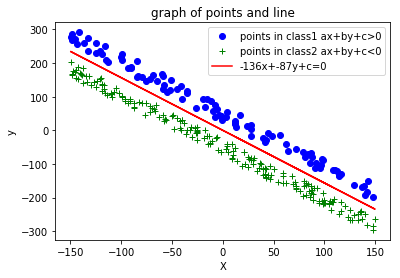

In [11]:
def generate_dataset(k0, k1):
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1"""
    
    #Variables of random 2D line chosen
    
    a=np.random.randint(-150,150)
    b=np.random.randint(-150,150)
    c=np.random.randint(-150,150)
    #ax+by+c=0 is the line
    
    # Generate the random data point(x)
    x_class1=np.random.uniform(-150,150,k0)
    x_class2=np.random.uniform(-150,150,k1)
    
    #calculating another data point based on where it should lie on the coordinate
    
    y_class1=((c-(a*x_class1))/b)+np.random.uniform(25,75,k0)  # ax+by+c>0
    y_class2=((c-(a*x_class2))/b)-np.random.uniform(25,75,k1)   # ax+by+c<0
    
    x_y_class1=[(x_class1[i],y_class1[i],1) for i in range(len(x_class1))]
    x_y_class2=[(x_class2[i],y_class2[i],-1) for i in range(len(x_class2))]
    
    #plotting the points
    plt.plot(x_class1,y_class1,'bo',label="points in class1 ax+by+c>0")
    plt.plot(x_class2,y_class2,'g+',label="points in class2 ax+by+c<0")
    
    #plotting a line
    label_line=str(a)+"x"+"+"+str(b)+"y"+"+"+"c"+"="+"0"
    x=list(x_class1)+list(x_class2)
    x=np.asarray(x)
    print(type(x))
    y=(-c-(a*x))/b
    plt.plot(x,y,'r-',label=label_line)
    #label the graph
    plt.title("graph of points and line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    """Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """
    
    
    
    
    return(x_y_class1+x_y_class2)
#assign number of data points for class1 and class2
k0=100
k1=200
var_bin_dist=generate_dataset(k0,k1)

## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



Weigths of the line that classifies the dataset
[949.52777885 665.25620671 567.        ]
<class 'numpy.ndarray'>


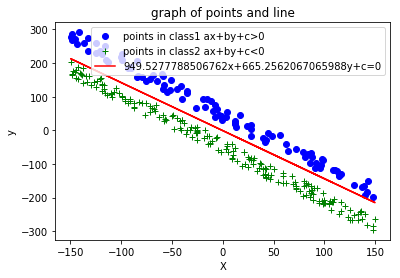

In [12]:
import pandas as pd
def fit_line(X, y):
    """Predict using the binary classification model. Use the dataset generated 
    using generate_data() as input for this function.
    
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    y : array_like, shape (n_labels, 1)"""
    
    
    # w vector is the coefficient vector, length of this is equal to len(X)+1
    
    # adding the 1 to the last coefficient in X var
    X=np.hstack((X,np.ones((len(X),1))))
    w=np.random.randint(0,1000,(len(X[0])))
    numofvar_classified=0
    while numofvar_classified<len(y):
        numofvar_classified=0
        for j,i in enumerate(X):
            y_pred=w.dot(i)
            if (y_pred>0) & (y[j]==1):
                numofvar_classified+=1
            elif (y_pred<0) & (y[j]==-1):
                numofvar_classified+=1
            else:
                w=w+(y[j]*i)
                
    """Returns
    -------
    w : array, shape (1,n_features)
        Returns the final weight vector w.  
    """
    return w

input_var=np.asarray(pd.DataFrame(var_bin_dist)[[0,1]])
output_var=np.asarray(pd.DataFrame(var_bin_dist)[[2]])
w=fit_line(input_var,output_var)
print("Weigths of the line that classifies the dataset")
print(w)
# visualization 
#two dimensional viz
if (len(input_var[0])+1)==3:
    x_class1=[i[0] for i in var_bin_dist if i[2]==1]
    y_class1=[i[1] for i in var_bin_dist if i[2]==1]
    x_class2=[i[0] for i in var_bin_dist if i[2]==-1]
    y_class2=[i[1] for i in var_bin_dist if i[2]==-1]
    plt.plot(x_class1,y_class1,'bo',label="points in class1 ax+by+c>0")
    plt.plot(x_class2,y_class2,'g+',label="points in class2 ax+by+c<0")
    a=w[0]
    b=w[1]
    c=w[2]
    
    #plotting a line
    label_line=str(a)+"x"+"+"+str(b)+"y"+"+"+"c"+"="+"0"
    x=list(x_class1)+list(x_class2)
    x=np.asarray(x)
    print(type(x))
    y=(-c-(a*x))/b
    plt.plot(x,y,'r-',label=label_line)
    #label the graph
    plt.title("graph of points and line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
else:
    print("Cannot be visualized")


### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer: In the above question we are randomly choosing a,b,c( coefficients of the line ax+by+c=0). 
  Lets just assume that above chosen coefficients incorrectly group all the data on the same side of the line.
  Now lets start evaluating the line for its accuracy.
  
  Take (x,y) and assume the model predicts ax+by+c<0 and let actual y be -1, since the model has incorrectly classified the point. We will update the weight vector. This continues until al the points are classified correctly into respective class
  
  The update algorithm is:-
  If the output is high than the actual output i.e. y>Ypred, increasing the coefficient of the negative variable and decreasing the coefficient of the postive variable will reduce overall output. 
  
    If the output is low than the actual output i.e. y>Ypred, decreasing the coefficient of the negative variable and increasing the coefficient of the postive variable will increase overall output. 
    
    

- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: When the data is not linearly separable we can transform the data to linearly separable space. Any data can be transformed to linearly separable space. The transformed data should have following properties 
  1) T(x1+x2)=T(x1)+T(x2) and T(α * X)=α * T(X), we can use the transformed data to fit the curve. 
  For eg. y=cx^(2) can be formulated as 
  x^(2)=z and y=c*z ( which is linearly separable data)